In [31]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
complete_data = pd.merge(ride_data,city_data, on = "city", how = "left")
complete_data = complete_data.drop_duplicates("ride_id")
# Display the data table for preview
complete_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [34]:
city_data.shape

(120, 3)

In [35]:
ride_data.shape

(2375, 4)

In [2]:
np.shape(complete_data)

(2375, 6)

## Bubble Plot of Ride Sharing Data

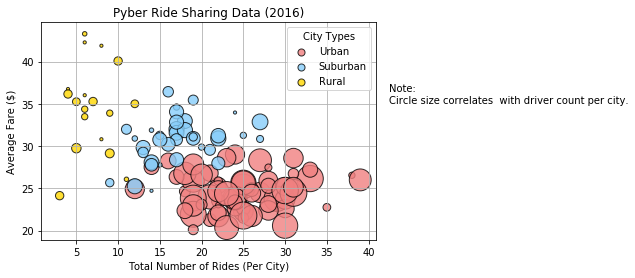

In [40]:
# Obtain the x and y coordinates for each of the three city types
groupby_city = complete_data.groupby("city")
city_based_data = pd.DataFrame(groupby_city["ride_id"].count())
city_based_data = city_based_data.rename(columns ={"ride_id":"Total Number of Rides"} )
city_based_data["Average Fare"] = groupby_city["fare"].mean()
city_based_data["Total Number of Drivers"] = groupby_city["driver_count"].mean()
city_based_data["City Type"] = groupby_city["type"].unique()
city_based_data["Color"] = ["tomato" if i=="Urban" else "lightskyblue" if i=="Suburban" else "gold" 
                            for i in city_based_data["City Type"]]


# plt.scatter(city_based_data["Total Number of Rides"], city_based_data["Average Fare"],
#            s =city_based_data["Total Number of Drivers"], c = city_based_data["Color"],
#           alpha = 0.8,edgecolors="k", label = types)


urban_df = city_based_data[city_based_data["City Type"]=="Urban"]

suburban_df = city_based_data[city_based_data["City Type"]=="Suburban"]

rural_df = city_based_data[city_based_data["City Type"]=="Rural"]

urban = plt.scatter(urban_df["Total Number of Rides"], urban_df["Average Fare"],
            s =urban_df["Total Number of Drivers"]*10, c = "lightcoral",
           alpha = .8,edgecolors="black", label = "Urban")

suburban = plt.scatter(suburban_df["Total Number of Rides"], suburban_df["Average Fare"],
            s =suburban_df["Total Number of Drivers"]*10, c = "lightskyblue",
           alpha = 0.8,edgecolors="black", label = "Suburban")

rural = plt.scatter(rural_df["Total Number of Rides"], rural_df["Average Fare"],
            s =rural_df["Total Number of Drivers"]*10, c = "gold",
           alpha = 0.8,edgecolors="black", label = "Rural")

#plt.ylim(15,45)
#plt.xlim(0,45)
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.figtext(.93, 0.6, 'Note:\nCircle size correlates  with driver count per city.')
#legendColors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}
#markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legendColors.values()]
#plt.legend(markers, legendColors.keys(), numpoints=1, title='City Types', loc='best')
legend = plt.legend(handles = [urban, suburban, rural],loc="best")
legend.set_title("City Types")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size


# Save Figure
plt.savefig("Bubble Plot of Ride Sharing Data")
# Show plot
plt.show()

## Total Fares by City Type

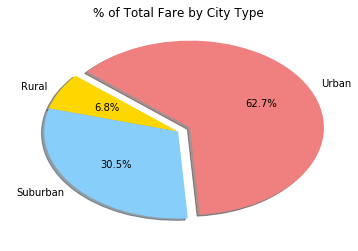

In [39]:
# Calculate Type Percents
groupby_type = complete_data.groupby("type")
type_based_data = pd.DataFrame(groupby_type["ride_id"].count())
type_based_data = type_based_data.rename(columns = {"ride_id":"Total Number of Rides"})
type_based_data["% of Total Fare by City Type"] = (groupby_type["fare"].sum()/complete_data["fare"].sum())*100
colors = [ "gold", "lightskyblue", "lightcoral"]
# Build Pie Chart
plt.pie(type_based_data["% of Total Fare by City Type"], explode = [0,0,0.1], 
        labels = type_based_data.index, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fare by City Type")
# Save Figure
plt.savefig("Total Fares by City Type")
plt.show()


## Total Rides by City Type

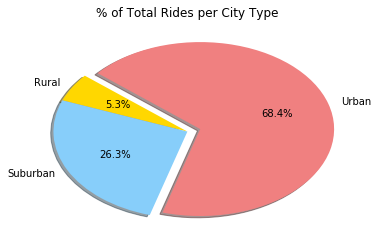

In [38]:
# Calculate Ride Percents
type_based_data["% of Total Rides per City Type"] = (groupby_type["fare"].count()/complete_data["fare"].count())*100
# Build Pie Chart
plt.pie(type_based_data["% of Total Rides per City Type"], explode = [0,0,0.1], 
        labels = type_based_data.index, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides per City Type")


# Save Figure
plt.savefig("Total Rides by City Type")

plt.show()


## Total Drivers by City Type

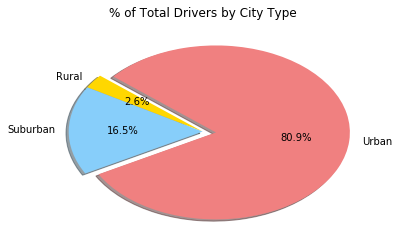

In [37]:
# Calculate Driver Percents
Total_Drivers_by_City_Type = city_data.groupby("type")["driver_count"].sum()
# Build Pie Chart
plt.pie(Total_Drivers_by_City_Type, explode = [0,0,0.1], 
        labels = type_based_data.index, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Build Pie Charts

# Save Figure
plt.savefig("Total Drivers by City Type")

plt.show()
